In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


Act Reading, label: proficent_score 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
actReading_11_df = pd.read_csv('../dataframes/actReading_11.csv')


In [3]:
print(actReading_11_df.dtypes)

studentId                 int64
is_proficient              bool
proficient_score        float64
course_ACT Review          bool
course_ACT/WK Rev.         bool
course_ACTReview.5C        bool
course_AG Communica        bool
course_AIDE-ELEM           bool
course_AIDE-LIB            bool
course_ALG I B ACCE        bool
course_ALIITRIGH/A         bool
course_ARMY LET I          bool
course_ARMY LET II         bool
course_ARMY LET III        bool
course_ARMY LET IV         bool
course_ARMYLETIVACT        bool
course_AcAdv.Baseba        bool
course_AcAdv.Basket        bool
course_AcAdv.CrossC        bool
course_AcAdv.Footb         bool
course_AcAdv.Softba        bool
course_AcAdv.Volley        bool
course_Accounting          bool
course_Adv BTA             bool
course_Advanced Agr        bool
course_Agriscience         bool
course_Alg Esntls B        bool
course_Alg II/Trig         bool
course_AlgEnrichmet        bool
course_AlgII/TrigAC        bool
course_Algebra I           bool
course_A

In [4]:
#changing all bools to ints 0 and 1 for the model
actReading_11_df[actReading_11_df.select_dtypes(include=['bool']).columns] = actReading_11_df.select_dtypes(include=['bool']).astype(int)
actReading_11_df.dtypes

studentId                 int64
is_proficient             int64
proficient_score        float64
course_ACT Review         int64
course_ACT/WK Rev.        int64
course_ACTReview.5C       int64
course_AG Communica       int64
course_AIDE-ELEM          int64
course_AIDE-LIB           int64
course_ALG I B ACCE       int64
course_ALIITRIGH/A        int64
course_ARMY LET I         int64
course_ARMY LET II        int64
course_ARMY LET III       int64
course_ARMY LET IV        int64
course_ARMYLETIVACT       int64
course_AcAdv.Baseba       int64
course_AcAdv.Basket       int64
course_AcAdv.CrossC       int64
course_AcAdv.Footb        int64
course_AcAdv.Softba       int64
course_AcAdv.Volley       int64
course_Accounting         int64
course_Adv BTA            int64
course_Advanced Agr       int64
course_Agriscience        int64
course_Alg Esntls B       int64
course_Alg II/Trig        int64
course_AlgEnrichmet       int64
course_AlgII/TrigAC       int64
course_Algebra I          int64
course_A

In [5]:
#Create Training and Test Data
y = actReading_11_df['proficient_score']
X= actReading_11_df.drop(['proficient_score','is_proficient', 'studentId'], axis=1)
print("Number of examples: " + str(X.shape[0]))

X_trainRead,X_testRead, y_trainRead,y_testRead  = train_test_split(X,y, test_size=0.20,stratify = actReading_11_df['is_proficient'],random_state=123)
print(X_trainRead.shape)
print(X_testRead.shape)


Number of examples: 2578
(2062, 238)
(516, 238)


In [6]:
#possible hyperparameters
'''
max_depth_values = [5,18,23,32]
n_estimators_value = [100,250,300,350]
param_grid = {'max_depth' : list(max_depth_values), 'n_estimators' : list(n_estimators_value)}

#Grid Search to find the best hyperparameters 
print("Running Grid Search")
rf_regressor = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_trainRead, y_trainRead)

print("Done")
rf_best_params = rf_grid_search.best_params_

rf_best_params
#{'max_depth': 32, 'n_estimators': 350}
'''

'\nmax_depth_values = [5,18,23,32]\nn_estimators_value = [100,250,300,350]\nparam_grid = {\'max_depth\' : list(max_depth_values), \'n_estimators\' : list(n_estimators_value)}\n\n#Grid Search to find the best hyperparameters \nprint("Running Grid Search")\nrf_regressor = RandomForestRegressor()\n\n# will have a 3-fold cross validation \nrf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring=\'neg_root_mean_squared_error\')\nrf_grid_search = rf_grid.fit(X_trainRead, y_trainRead)\n\nprint("Done")\nrf_best_params = rf_grid_search.best_params_\n\nrf_best_params\n#{\'max_depth\': 32, \'n_estimators\': 350}\n'

In [7]:
print('Begin Random Forest ')
rf_model = RandomForestRegressor(max_depth=32, n_estimators=350)
rf_model.fit(X_trainRead,y_trainRead)
print('End')

Begin Random Forest 
End


In [8]:
y_rf_predRead = rf_model.predict(X_testRead)
rf_rmse = mean_squared_error(y_testRead, y_rf_predRead, squared=False)
rf_r2 = r2_score(y_testRead, y_rf_predRead)

threshold = 1
y_rf_pred_bool = y_rf_predRead >= threshold
y_test_bool = y_testRead >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_rf_pred_bool, y_test_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.70      0.80       391
        True       0.48      0.86      0.61       125

    accuracy                           0.74       516
   macro avg       0.71      0.78      0.71       516
weighted avg       0.83      0.74      0.75       516

[RF] Root Mean Squared Error: 0.2231499268049755
[RF] R2: 0.5027236976659857


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
#looking at the micro score
micro_f1 = f1_score(y_test_bool, y_rf_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.7364341085271318


Confusion Matrix:
[[272  17]
 [119 108]]


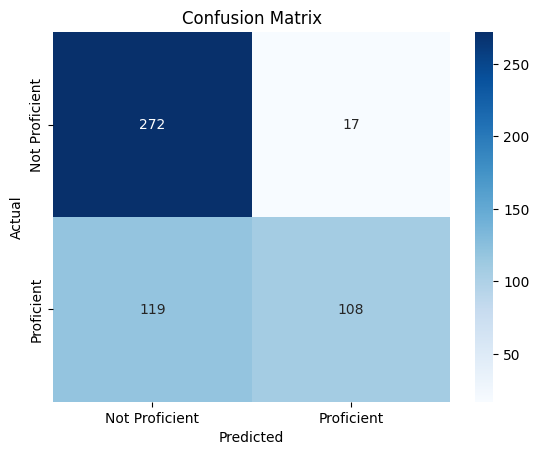

In [10]:
cm = confusion_matrix(y_test_bool, y_rf_pred_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance 

In [11]:
importances = rf_model.feature_importances_
feature_names = X_trainRead.columns

# Combine names and importances, and sort
importance_dfRead = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_dfRead= importance_dfRead.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_dfRead)

                  Feature    Importance
76    course_Eng Gr10 Adv  1.455306e-01
58    course_ChemistryAdv  1.364170e-01
84      course_Enviro Sci  3.195139e-02
40    course_BandConcer.5  1.772896e-02
177      course_Spanish 1  1.563442e-02
131   course_LIFE PE 9-12  1.475880e-02
104       course_Geometry  1.313419e-02
208         course_VarFBI  1.247325e-02
96    course_Food Nutritn  1.231887e-02
29     course_Algebra I B  1.163745e-02
158   course_Physical Sci  1.151053e-02
142      course_Music App  1.122513e-02
220      course_Vocal I 1  1.104430e-02
216    course_Vis Arts II  1.099580e-02
183   course_StudyHall912  9.783397e-03
215     course_Vis Arts I  9.155736e-03
186      course_Theatre I  8.804888e-03
24     course_Alg II/Trig  8.241533e-03
156    course_Phy Sci Adv  8.064769e-03
113    course_Health 9-12  8.007291e-03
198    course_USHis I Adv  7.918485e-03
128   course_Journalism 1  7.874960e-03
105   course_Geometry Adv  7.772309e-03
81    course_English Gr10  7.743128e-03


In [12]:
importance_dfRead.head(10)

,Feature,Importance
76,course_Eng Gr10 Adv,0.145531
58,course_ChemistryAdv,0.136417
84,course_Enviro Sci,0.031951
40,course_BandConcer.5,0.017729
177,course_Spanish 1,0.015634
131,course_LIFE PE 9-12,0.014759
104,course_Geometry,0.013134
208,course_VarFBI,0.012473
96,course_Food Nutritn,0.012319
29,course_Algebra I B,0.011637


In [13]:
import shap

c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
explainer = shap.Explainer(rf_model)
shap_test = explainer(X_testRead)
shap_df = pd.DataFrame(shap_test.values, columns=shap_test.feature_names,
  index=X_testRead.index)
# Fetch the importances
shap_df = shap_df.apply(np.abs).mean().sort_values(ascending=False)
print(shap_df)

course_Eng Gr10 Adv     4.834042e-02
course_ChemistryAdv     4.254120e-02
course_Physical Sci     2.204214e-02
course_LIFE PE 9-12     1.171491e-02
course_Algebra I B      9.742051e-03
course_Enviro Sci       9.085870e-03
course_English Gr10     8.381268e-03
course_Spanish 1        7.137316e-03
course_Alg II/Trig      5.855651e-03
course_US His-1877      5.248867e-03
course_Mustang Advi     5.200079e-03
course_StudyHall912     5.071333e-03
school_High School C    4.536774e-03
course_Health 9-12      4.409262e-03
course_Geometry         3.516413e-03
course_Music App        3.496856e-03
course_VarFBII          3.455629e-03
course_Vis Arts II      3.421755e-03
course_VisArtI.5C       3.154604e-03
course_D&TSafetyEd      3.135531e-03
course_USHis I Adv      3.039215e-03
course_ALIITRIGH/A      2.936051e-03
course_Theatre I        2.699628e-03
course_Agriscience      2.623440e-03
course_HEALTH 9-12      2.607946e-03
course_Food Nutritn     2.596995e-03
course_BandConcer.5     2.572879e-03
i

SHAP (SHapley Additive Explanations) interpreting the predictions of machine learning models

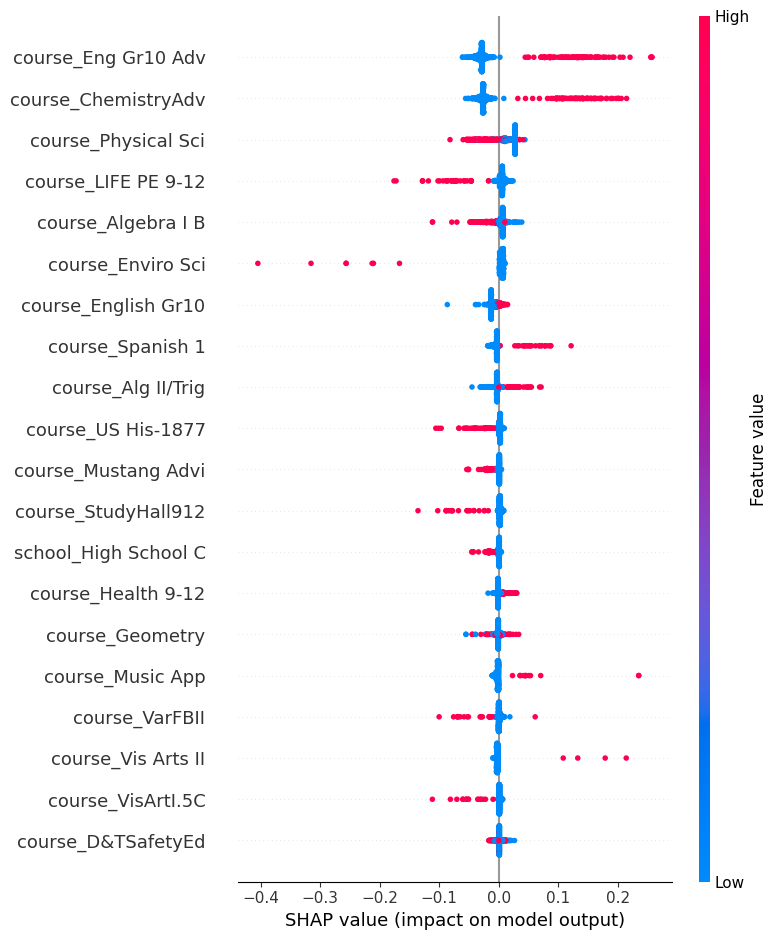

In [17]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_testRead)
shap.summary_plot(shap_values,X_testRead)
shap.initjs()  
base_value = explainer.expected_value
shap.force_plot(base_value,shap_values[0], X_testRead.iloc[0])
